Loads data from the dataset

In [14]:
import matplotlib.pyplot as plt # for plotting
import numpy as np # for transformation

import torch # PyTorch package
import torchvision # load datasets
import torchvision.transforms as transforms # transform data
import torch.nn as nn # basic building block for neural neteorks
import torch.nn.functional as F # import convolution functions like Relu
import torch.optim as optim # optimzer

data_transforms = {
    'training' : transforms.Compose([transforms.RandomResizedCrop(224),
                                    transforms.RandomHorizontalFlip(),transforms.RandomRotation(30),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406], 
                                                         [0.229, 0.224, 0.225])]),
                                                            
    'validation' : transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], 
                                                           [0.229, 0.224, 0.225])]),

    'testing' : transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], 
                                                           [0.229, 0.224, 0.225])])
}

# set batch_size
batch_size = 4

# set number of workers
num_workers = 2

train_set = torchvision.datasets.Flowers102(root='./data', split="train", download=True, transform=data_transforms['training'])
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)

test_set = torchvision.datasets.Flowers102(root='./data', split="test", download=True, transform=data_transforms['testing'])
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

val_set = torchvision.datasets.Flowers102(root='./data', split="val", download=True, transform=data_transforms['validation'])
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=2)                                        
 

0.1%

100.0%


Extracting data\flowers-102\102flowers.tgz to data\flowers-102


100.0%


100.0%

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


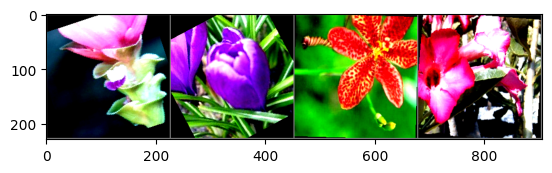

tensor(38)
tensor(66)
tensor(101)
tensor(84)


In [3]:
def imshow(img):
  ''' function to show image '''
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy() # convert to numpy objects
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# get random training images with iter function
dataiter = iter(train_loader)
images, labels = next(dataiter)

# call function on our images
imshow(torchvision.utils.make_grid(images))

# print the class of the image
for i in range(batch_size):
  print(labels[i])

In [15]:
class Net(nn.Module):
	
    def __init__(self):
        super(Net, self).__init__()
	# 3 input image channel, 6 output channels, 
	# 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(3, 6, 5)
	# Max pooling over a (2, 2) window
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5) 
        self.fc1 = nn.Linear(16 * 53 * 53, 120)# 5x5 from image dimension
        self.fc2 = nn.Linear(120, 110)
        self.fc3 = nn.Linear(110, 102)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 53 * 53)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=44944, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=110, bias=True)
  (fc3): Linear(in_features=110, out_features=102, bias=True)
)


In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [17]:
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

start.record()

for epoch in range(90):  # loop over the dataset multiple times
    print("------------------------")
    print("epoch: ",epoch,"/90")
    print("------------------------/n")
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        print(inputs.shape)
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

# whatever you are timing goes here
end.record()

# Waits for everything to finish running
torch.cuda.synchronize()

print('Finished Training')
print(start.elapsed_time(end))  # milliseconds

------------------------
epoch:  0 /90
------------------------
torch.Size([4, 3, 224, 224])
------------------------
epoch:  0 /90
------------------------
torch.Size([4, 3, 224, 224])
------------------------
epoch:  0 /90
------------------------
torch.Size([4, 3, 224, 224])
------------------------
epoch:  0 /90
------------------------
torch.Size([4, 3, 224, 224])
------------------------
epoch:  0 /90
------------------------
torch.Size([4, 3, 224, 224])
------------------------
epoch:  0 /90
------------------------
torch.Size([4, 3, 224, 224])
------------------------
epoch:  0 /90
------------------------
torch.Size([4, 3, 224, 224])
------------------------
epoch:  0 /90
------------------------
torch.Size([4, 3, 224, 224])
------------------------
epoch:  0 /90
------------------------
torch.Size([4, 3, 224, 224])
------------------------
epoch:  0 /90
------------------------
torch.Size([4, 3, 224, 224])
------------------------
epoch:  0 /90
------------------------
torch.

KeyboardInterrupt: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


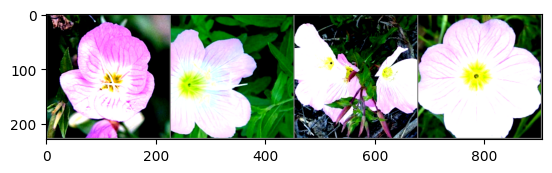

GroundTruth: 
tensor(0)
tensor(0)
tensor(0)
tensor(0)


In [7]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ')
for i in range(4):
  print(labels[i])

In [8]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)

for i in range(4):
  print(predicted[i])


tensor(0)
tensor(97)
tensor(81)
tensor(0)


In [10]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 1.
Original Traceback (most recent call last):
  File "c:\Users\rosie\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\data\_utils\worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rosie\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\data\_utils\fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "c:\Users\rosie\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\datasets\flowers102.py", line 81, in __getitem__
    image = PIL.Image.open(image_file).convert("RGB")
            ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rosie\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py", line 3247, in open
    fp = builtins.open(filename, "rb")
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\rosie\\Documents\\GitHub\\IMLO-assessment\\data\\flowers-102\\jpg\\image_08102.jpg'
